In [21]:
import pandas as pd
import numpy as np
import missingno as msn
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
link = "1704636031seaplanetravel.csv"
seaplane_df = pd.read_csv(link)

In [23]:
seaplane_df.head()

,Month,#Passengers
0,2003-01,112
1,2003-02,118
2,2003-03,132
3,2003-04,129
4,2003-05,121


In [24]:
seaplane_df.shape

(144, 2)

In [25]:
seaplane_df = pd.read_csv(link, index_col='Month', parse_dates=True)

In [26]:
seaplane_df.head()

,#Passengers
Month,
2003-01-01,112
2003-02-01,118
2003-03-01,132
2003-04-01,129
2003-05-01,121


In [27]:
seaplane_df.isnull().sum()

#Passengers    0
dtype: int64

In [28]:
seaplane_df.index.freq = None

In [29]:
seaplane_df = pd.DataFrame(seaplane_df['#Passengers'])

<Axes: xlabel='Month'>

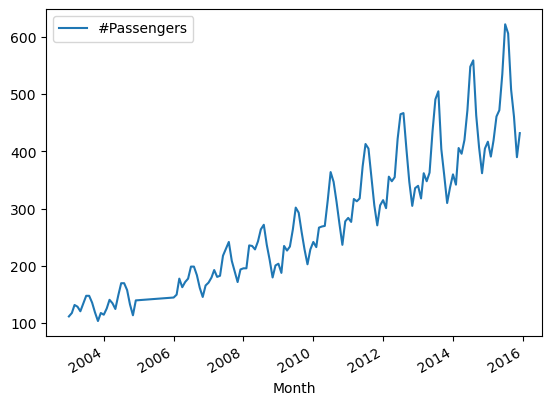

In [30]:
seaplane_df.plot()

In [33]:
train = seaplane_df.iloc[:100, 0]
test = seaplane_df.iloc[100:, 0]

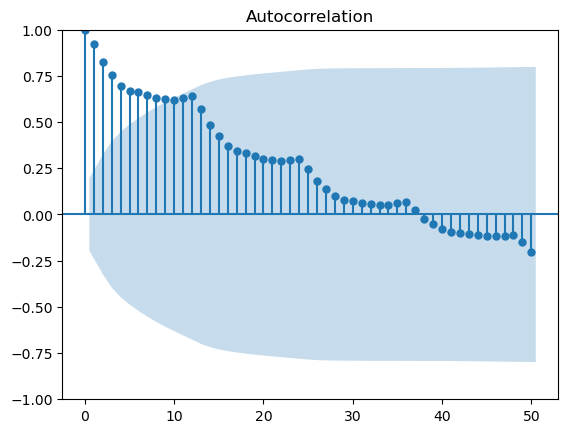

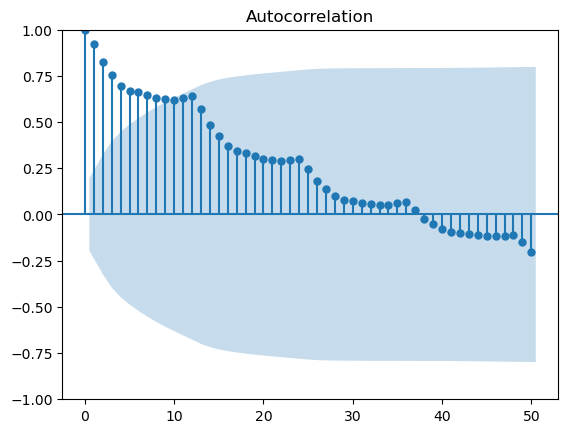

In [40]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(train, lags=50)


In [41]:
from pmdarima import auto_arima
auto_arima(seaplane_df, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1415.278, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1403.473, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1398.827, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1413.909, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1396.121, Time=0.11 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1398.386, Time=0.13 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1397.975, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1394.683, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1397.258, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1401.852, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1378.338, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=1396.5

ARIMA(order=(4, 1, 3), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

# Developing ARIMA MODEL

In [43]:
from statsmodels.tsa.arima.model import ARIMA
a_model = ARIMA(train, order=(4,1,3))
predictor = a_model.fit()
predictor.summary()

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            #Passengers   No. Observations:                  100
Model:                 ARIMA(4, 1, 3)   Log Likelihood                -430.177
Date:                Sun, 14 Jan 2024   AIC                            876.353
Time:                        23:36:46   BIC                            897.114
Sample:                             0   HQIC                           884.753
                                - 100                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8252      0.130      6.338      0.000       0.570       1.080
ar.L2          0.4031      0.153      2.627      0.009       0.102       0.704
ar.L3         -0.6580      0.126     -5.211      0.000      -0.905      -0.411
ar.L4         -0.0737      0.125     -0.588      0.557      -0.319       0.172
ma.L1         -0.8540    261.775     -0.003      0.997    -513.923     512.215
ma.L2         -0.8568    485.330     -0.002      0.999    -952.085     950.372
ma.L3          0.9971    261.048      0.004      0.997    -510.648     512.642
sigma2       316.6451   8.29e+04      0.004      0.997   -1.62e+05    1.63e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.44   Jarque-Bera (JB):                 4.17
Prob(Q):                              0.51   Prob(JB):                         0.12
Heteroskedasticity (H):               3.32   Skew:                             0.45
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [44]:
predictor_results = predictor.predict(start = len(train), end = len(train) + len(test) - 1, type = 'levels')

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [45]:
predictor_results

100    357.610513
101    373.011920
102    363.644483
103    356.388534
104    335.783046
105    320.883023
106    305.745894
107    301.340984
108    302.926460
109    313.516951
110    326.909120
111    341.510810
112    351.873489
113    356.718677
114    354.299784
115    346.362463
116    334.885886
117    323.450363
118    314.788298
119    311.166827
120    313.056647
121    319.698387
122    328.962088
123    338.307230
124    345.243738
125    348.150119
126    346.513108
127    341.081141
128    333.515321
129    325.945289
130    320.343399
131    318.047591
132    319.433346
133    323.895150
134    330.059021
135    336.201413
136    340.716938
137    342.534725
138    341.359247
139    337.698272
140    332.674589
141    327.692769
142    324.052143
143    322.614928
Name: predicted_mean, dtype: float64

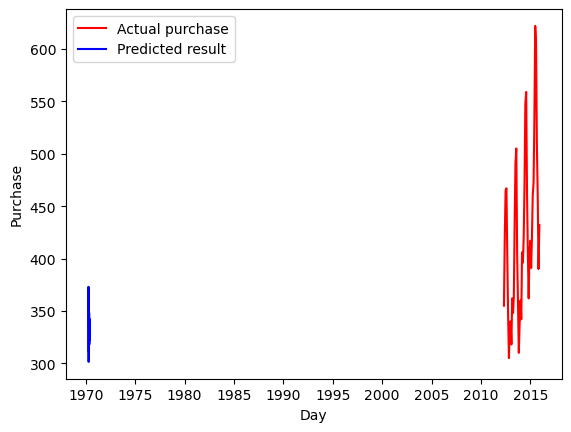

In [48]:
plt.plot(test, color='red', label = 'Actual purchase')
plt.plot(predictor_results, color='blue', label = 'Predicted result')
plt.xlabel('Day')
plt.ylabel('Purchase')
plt.legend()
plt.show()